In [2]:
%load_ext autoreload 
%autoreload 2
from jimFisher.Fisher import FisherSamples
import matplotlib.pyplot as plt
import corner
import numpy as np
import jax.numpy as jnp
from jimFisher.utils import LABELS, convert_to_physical, inverse_operations, operations, convert_to_ripple_params
import jax
jax.config.update("jax_enable_x64", True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
fisher = FisherSamples(name="CE", fmin = 20, fmax = 1024, sensitivity="CE", location="H1", duration=4, 
                  trigger_time=562678816.12345678,
                waveform="IMRPhenomD", f_ref=20.0, 
                       fisher_parameters=["log_chirp_mass", "logit_mass_ratio", "s1_z",  "log_luminosity_distance",
                                         "cos_iota"])

In [17]:
true_params = {"chirp_mass": 10, "mass_ratio": 0.8, "s1_z": 0.5, "s2_z":0.1, 
              "luminosity_distance": 6000, "phase_c": 0.2, "cos_iota": 0.5, "ra": 1.1,
              "dec": 0.1, 'psi': 0.3, "t_c": 0.0, "s1_x": 0.0, "s1_y":0.0, "s2_x": 0.0, "s2_y": 0.0}


In [18]:
fisher.set_at_true(true_params)
print(fisher.true_parameters)

{'log_chirp_mass': Array(2.30258509, dtype=float64, weak_type=True), 'logit_mass_ratio': Array(1.38629436, dtype=float64, weak_type=True), 's1_z': 0.5, 'log_luminosity_distance': Array(8.69951475, dtype=float64, weak_type=True), 'cos_iota': 0.5, 'M_c': 10, 'eta': 0.24691358024691357, 'd_L': 6000, 'iota': Array(1.04719755, dtype=float64, weak_type=True), 'ra': 1.1, 'dec': 0.1, 'phase_c': 0.2, 'psi': 0.3, 's1_x': 0.0, 's1_y': 0.0, 's2_x': 0.0, 's2_y': 0.0, 's2_z': 0.1, 't_c': 0.0, 'gmst': 3.8183258779996607, 'epoch': 2}


In [19]:
fisher.get_snr(fisher.true_parameters)

Array(45.5814142, dtype=float64)

In [20]:
fisher.set_observed_properties(seed=980, zero_noise=False)

In [21]:
observed_samples = fisher.draw_physical_samples(N=5000)

drawing observed samples


<Figure size 640x480 with 0 Axes>

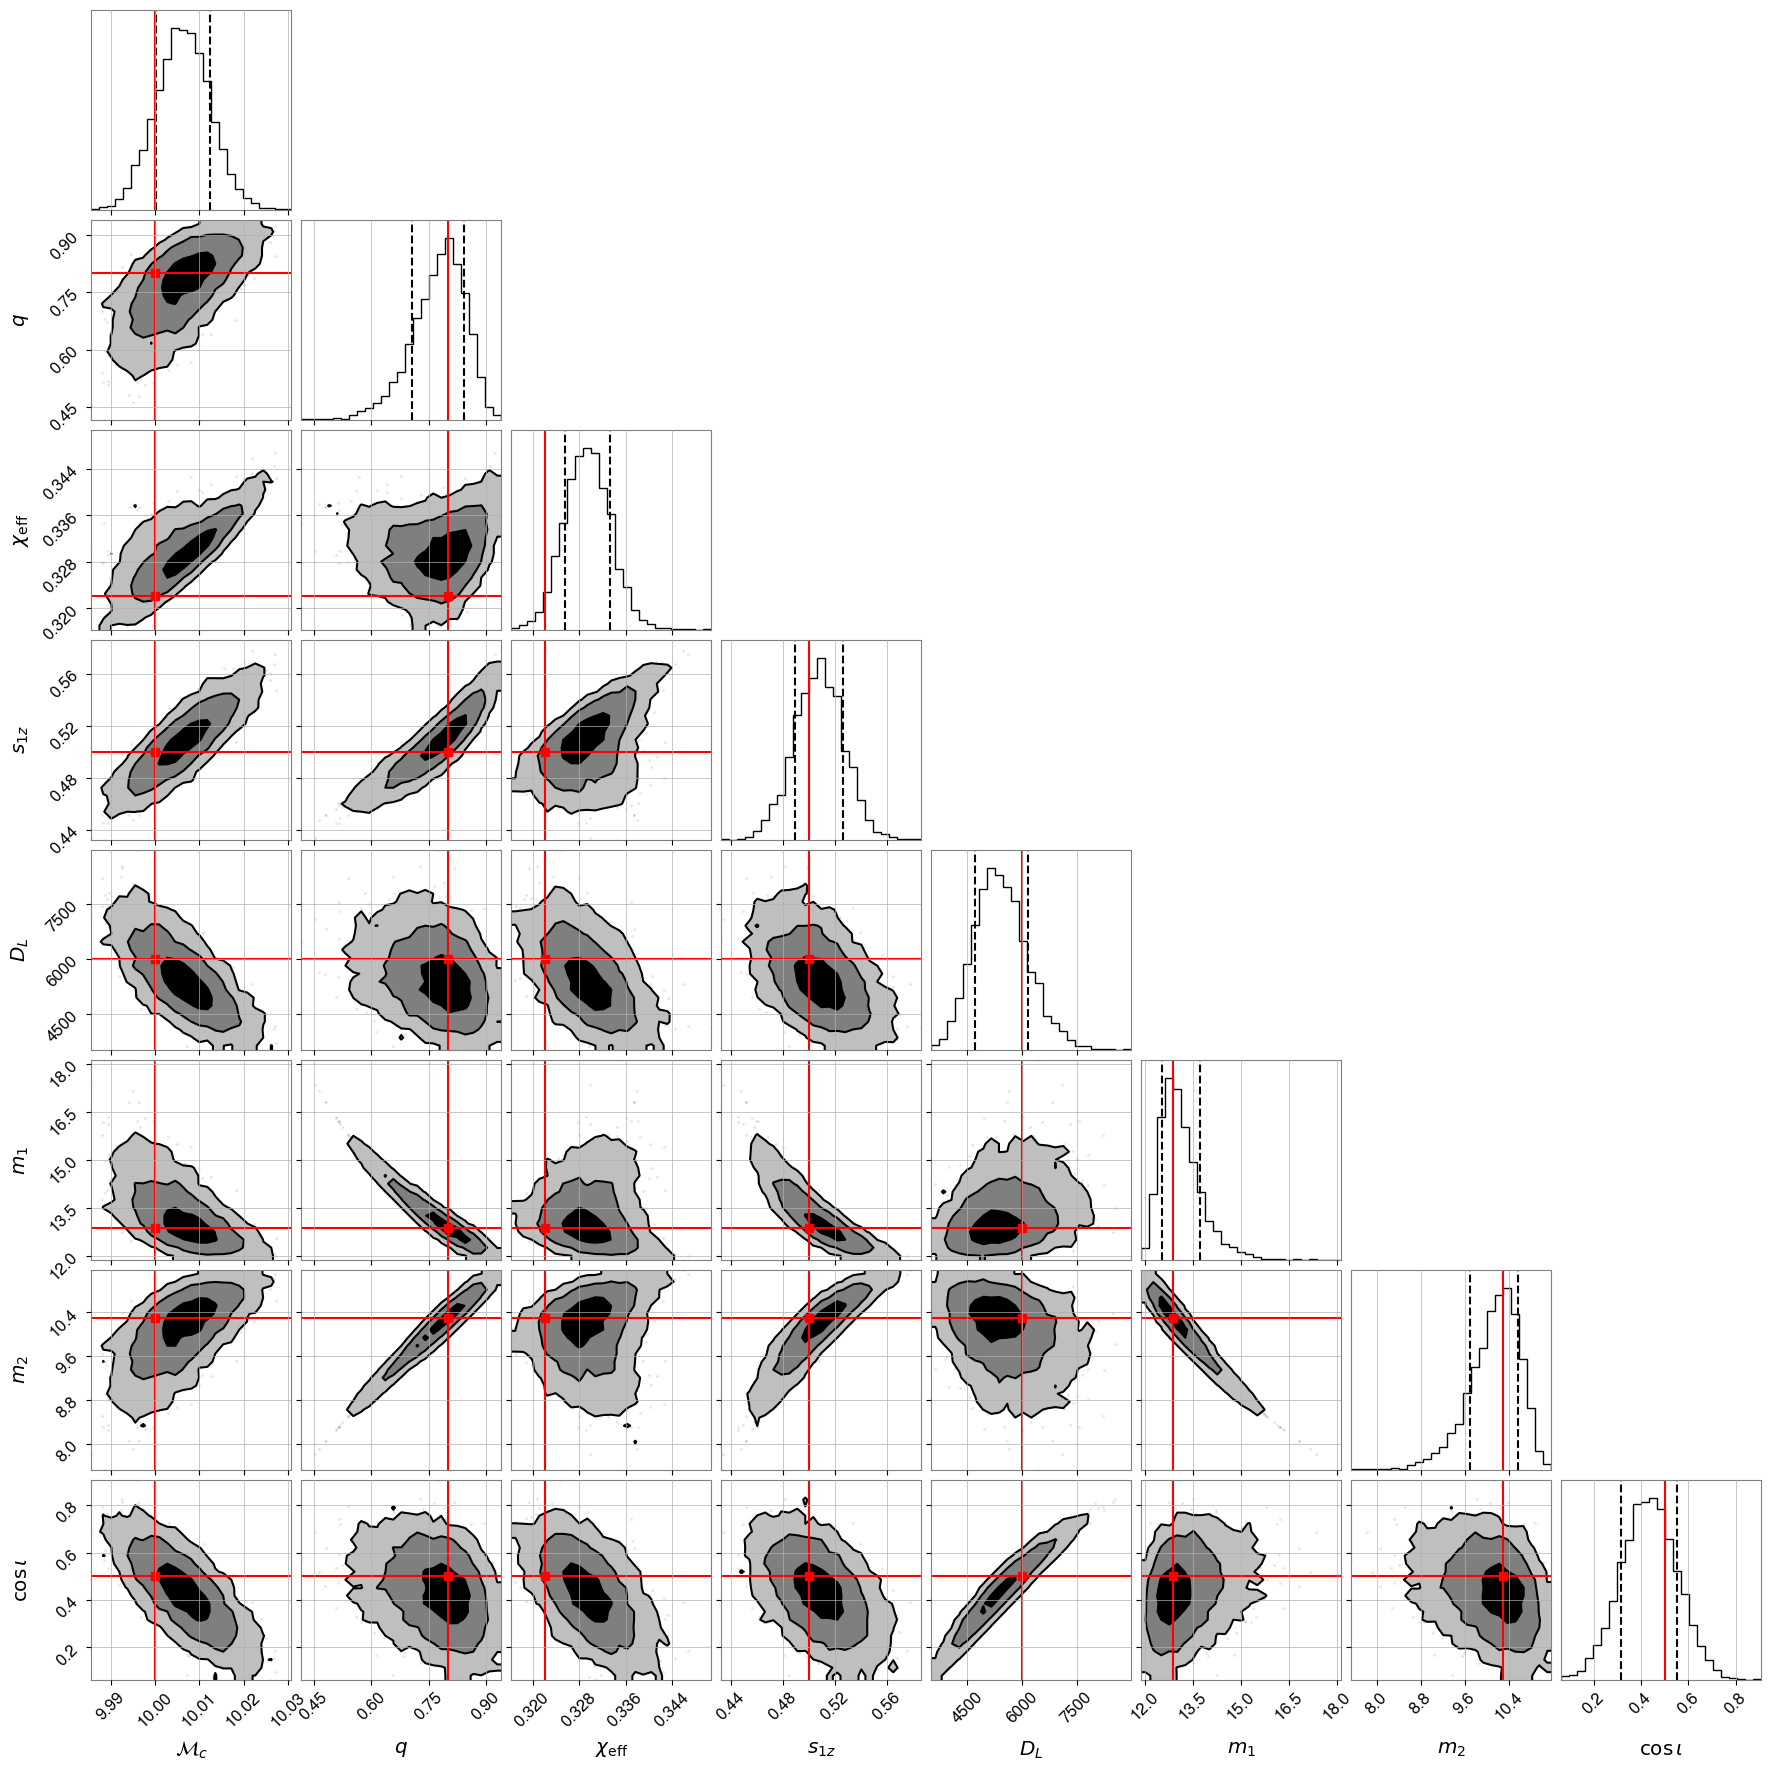

In [22]:
plt.figure()
corner_kwargs = dict(
    bins=25, smooth=0.5,
    title_kwargs=dict(fontsize=16), 
    truth_color='r', quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=True, plot_datapoints=True, fill_contours=True,
)

plot_params = ["chirp_mass", "mass_ratio", "chi_eff", "s1_z", "luminosity_distance", "mass_1", "mass_2", "cos_iota"]
fig=corner.corner({key: observed_samples[key] for key in plot_params}, truths=[convert_to_physical(fisher.true_parameters)[key] for key in plot_params],
              labels=[LABELS[key] for key in plot_params], color='k',**corner_kwargs)
plt.show()